In [55]:
#Step 1: Import & Read Data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('data/historic_fraud_activity.csv')

df_sample = df.sample(n=3000, random_state=22)

df_sample.shape

(3000, 11)

In [56]:
df_sample.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3000.0
mean,245.576667,1.747453e+05,7.785172e+05,7.985536e+05,1.002432e+06,1.116843e+06,0.002333,0.0
std,142.341753,5.190138e+05,2.867347e+06,2.903634e+06,2.301546e+06,2.510240e+06,0.048256,0.0
min,1.000000,3.426000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,157.000000,1.239639e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,251.000000,6.203722e+04,1.186950e+04,0.000000e+00,8.621662e+04,1.696320e+05,0.000000,0.0
75%,346.000000,2.027490e+05,1.043330e+05,1.171360e+05,8.967043e+05,1.068229e+06,0.000000,0.0
max,718.000000,1.744065e+07,3.006558e+07,3.009832e+07,3.132971e+07,4.877036e+07,1.000000,0.0


In [57]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [58]:
df = df[[ 'step', 
      #'type', 
      'amount', 
      #'nameOrig', 
      'oldbalanceOrg', 'newbalanceOrig',
      #'nameDest', 
      'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'
    ]].copy()

In [59]:
df.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

/var/folders/pk/nmfr88y52w5f05487rwnmf880000gn/T/ipykernel_27799/1968281385.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=df_melted, palette='PuBu')


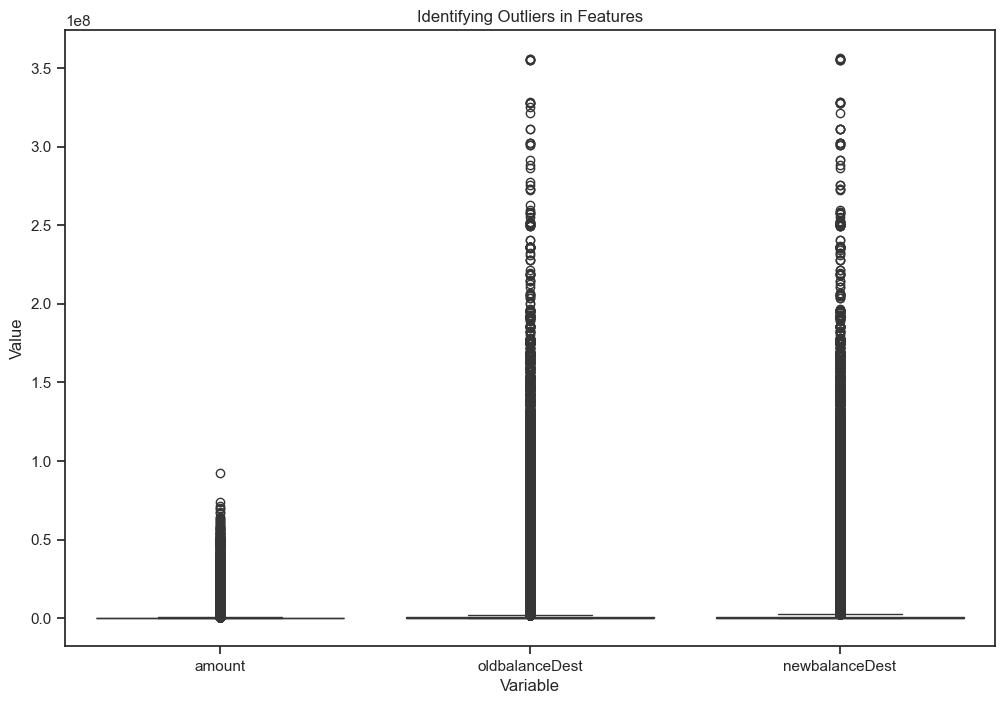

In [60]:
# Melt DataFrame to get all numerical columns under one 'value' column
df_melted = df[['amount', 'oldbalanceDest', 'newbalanceDest']].melt(var_name='Variable', value_name='Value')

sns.set(style="ticks")

# Create the box plot for multiple variables to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='Variable', y='Value', data=df_melted, palette='PuBu')
plt.title('Identifying Outliers in Features')
plt.show()

In [67]:
# List of variables to check for outliers
columns_to_check = ['amount', 'oldbalanceDest', 'newbalanceDest']

# Initialize dictionaries to store bounds
lower_bounds = {}
upper_bounds = {}

# Calculate IQR and define bounds for each column
for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Store bounds
    lower_bounds[column] = lower_bound
    upper_bounds[column] = upper_bound

    # Print out bounds for each column
    print(f"Column: {column}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print()

# Now, filter out the outliers for each column
df_no_outliers = df.copy()
for column in columns_to_check:
    df_no_outliers = df_no_outliers[
        (df_no_outliers[column] >= lower_bounds[column]) & 
        (df_no_outliers[column] <= upper_bounds[column])
    ]

# Create a DataFrame for outliers (rows outside the bounds)
df_outliers = df.copy()
for column in columns_to_check:
    df_outliers = df_outliers[
        (df_outliers[column] < lower_bounds[column]) | 
        (df_outliers[column] > upper_bounds[column])
    ]

# Show number of removed outliers
print(f"Removed {df.shape[0] - df_no_outliers.shape[0]} outliers.")

# Display first few rows of non-outliers and outliers
print("First few rows of data without outliers:")
print(df_no_outliers.head())

print("First few rows of outliers:")
print(df_outliers.head())


Column: amount
Lower Bound: -0.7608908961843526
Upper Bound: 0.5330016943115327

Column: oldbalanceDest
Lower Bound: -0.7399598849773108
Upper Bound: 0.369762754317406

Column: newbalanceDest
Lower Bound: -0.7873595472851078
Upper Bound: 0.42316883089074786

Removed 1012766 outliers.
First few rows of data without outliers:
   step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1 -0.281560       170136.0       160296.36       -0.323814   
1     1 -0.294767        21249.0        19384.72       -0.323814   
2     1 -0.297555          181.0            0.00       -0.323814   
3     1 -0.297555          181.0            0.00       -0.317582   
4     1 -0.278532        41554.0        29885.86       -0.323814   

   newbalanceDest  isFraud  isFlaggedFraud  
0       -0.333411        0               0  
1       -0.333411        0               0  
2       -0.333411        1               0  
3       -0.333411        1               0  
4       -0.333411        0              

/var/folders/pk/nmfr88y52w5f05487rwnmf880000gn/T/ipykernel_27799/1242739575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Variable', y='Value', data=df_melted, palette='PuBu')


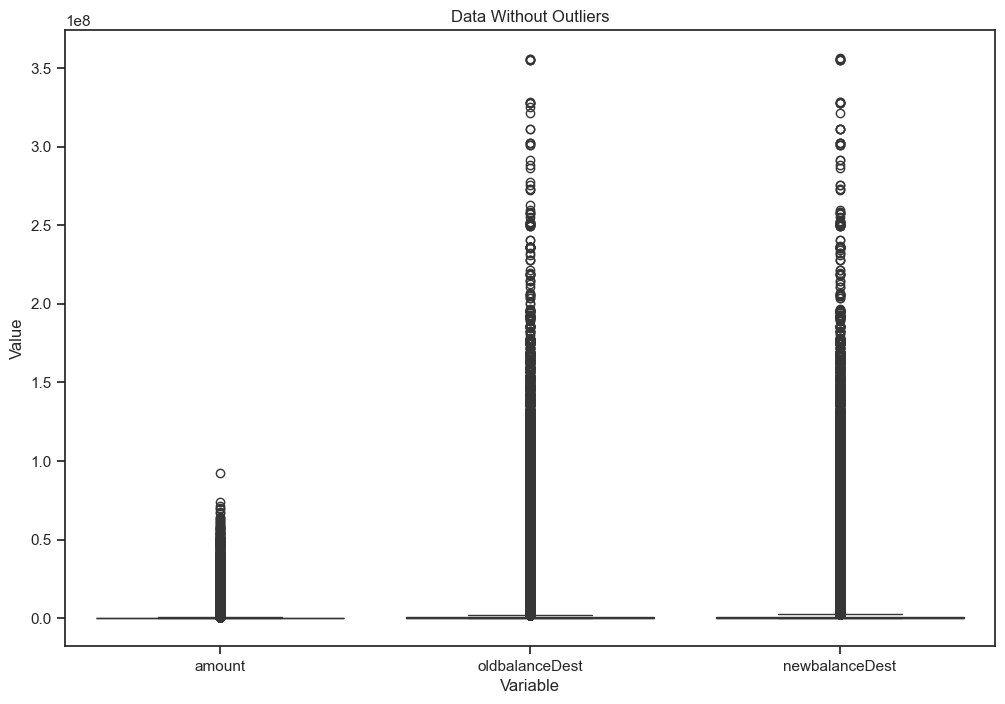

In [64]:
# Box plot for data without outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='Variable', y='Value', data=df_melted, palette='PuBu')
plt.title('Data Without Outliers')
plt.show()

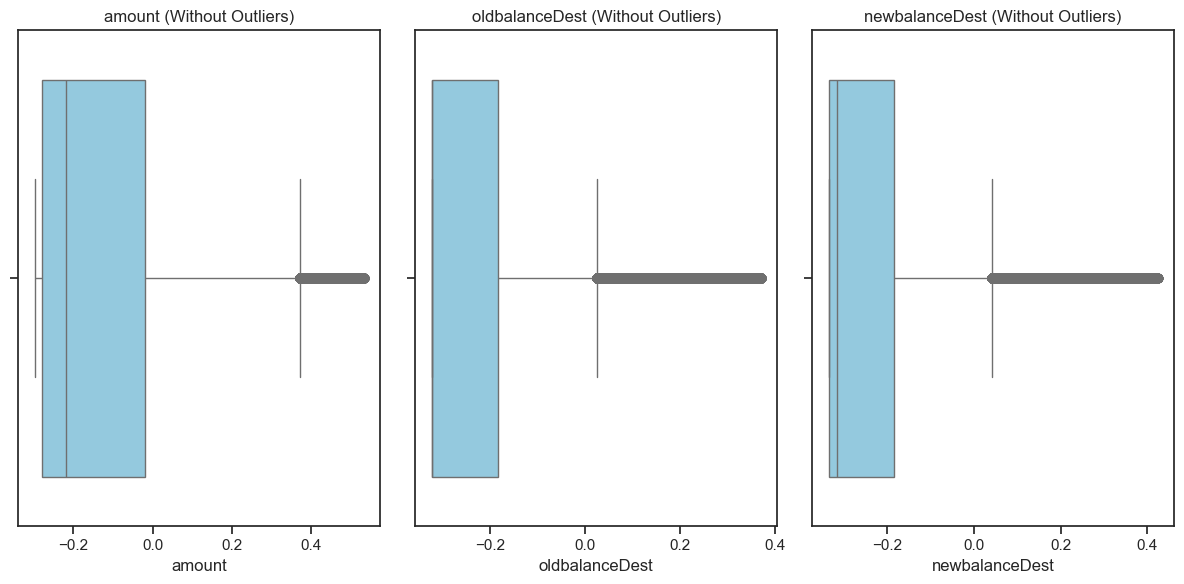

In [68]:
# List of columns to plot
columns_to_plot = ['amount', 'oldbalanceDest', 'newbalanceDest']

# Box Plot for Data Without Outliers
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(data=df_no_outliers, x=column, color='skyblue')
    plt.title(f'{column} (Without Outliers)')
plt.tight_layout()
plt.show()

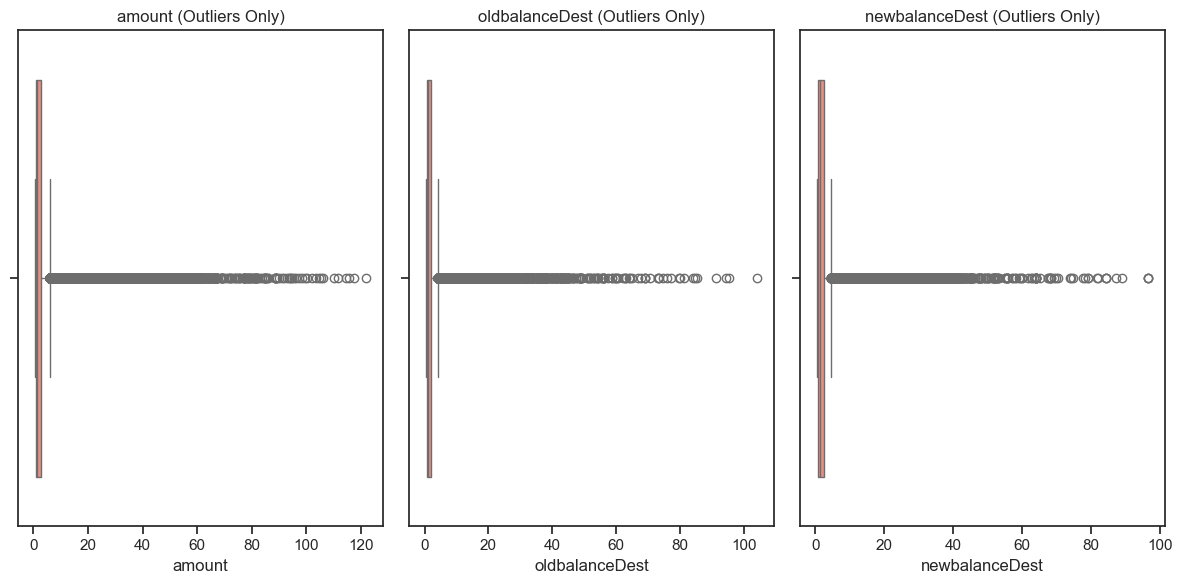

In [69]:
# Box Plot for Only Outliers Data
plt.figure(figsize=(12, 6))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(1, len(columns_to_plot), i)
    sns.boxplot(data=df_outliers, x=column, color='salmon')
    plt.title(f'{column} (Outliers Only)')
plt.tight_layout()
plt.show()

In [70]:
# Standardization
scaler = StandardScaler()
columns_to_standardize = ['amount', 'oldbalanceDest', 'newbalanceDest']
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Check the transformed data
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,-0.281560,170136.0,160296.36,-0.323814,-0.333411,0,0
1,1,-0.294767,21249.0,19384.72,-0.323814,-0.333411,0,0
2,1,-0.297555,181.0,0.00,-0.323814,-0.333411,1,0
3,1,-0.297555,181.0,0.00,-0.317582,-0.333411,1,0
4,1,-0.278532,41554.0,29885.86,-0.323814,-0.333411,0,0


In [74]:
df.dtypes

step                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object